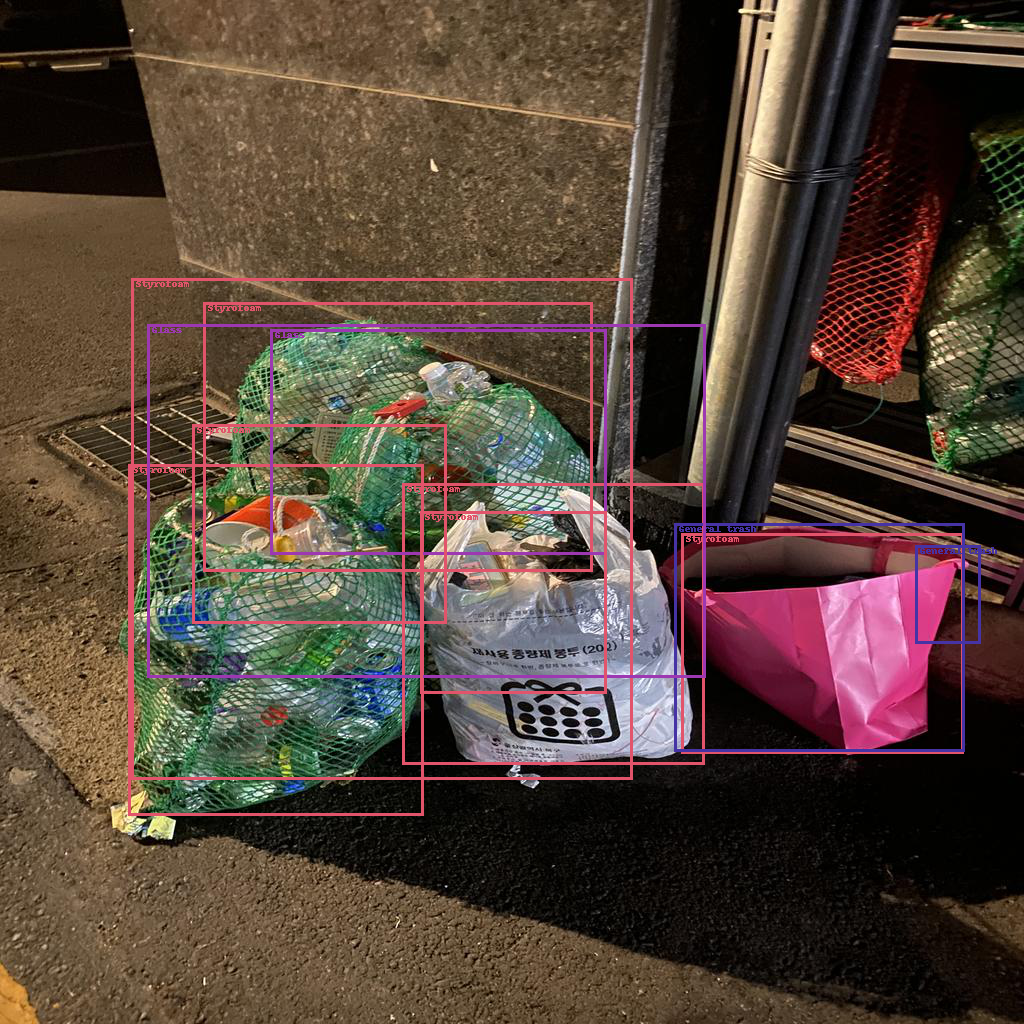

In [2]:
import pandas as pd
import random
from PIL import Image, ImageDraw

csv_data = pd.read_csv('/opt/ml/level2_objectdetection-cv-09/save/Epoch_10/submission.csv')
idx = random.randint(0, 4870)
temp = csv_data.iloc[idx][0].split(' ')
boxes = []

for i in range(int((len(temp) - 1) / 6)) :
    boxes.append(temp[6*i : 6*(i+1)])

idx = str(idx)
while len(idx) != 4 :
    idx = '0' + idx
img = Image.open('/opt/ml/dataset/test/'+ str(idx) +'.jpg')

classes = ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(classes))]

draw = ImageDraw.Draw(img)
for i in range(len(boxes)):
    box = boxes[i][2:]
    for k in range(len(box)) :
        box[k] = float(box[k])
    label = int(boxes[i][0])
    color = colors[label]
    draw.rectangle(box, outline=color, width=3)
    draw.text((box[0]+5,box[1]),  classes[label], fill=color)
img.show()